In [2]:
import pandas as pd

def compare_status(csv1, csv2):
    # Leer los CSV
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)

    # Asegurar que ambas tienen la columna "status"
    if "status" not in df1.columns or "status" not in df2.columns:
        raise ValueError("Ambos CSV deben contener la columna 'status'")

    # Convertir a sets para comparación rápida
    status1 = set(df1["status"].astype(str))
    status2 = set(df2["status"].astype(str))

    # Diferencias
    only_in_1 = status1 - status2
    only_in_2 = status2 - status1
    common = status1 & status2

    return {
        "solo_en_csv1": list(only_in_1),
        "solo_en_csv2": list(only_in_2),
        "en_ambos": list(common)
    }

# Ejemplo de uso
resultados = compare_status("times_create_object_moea.csv", "times_get_object_moea.csv")
print(resultados)


{'solo_en_csv1': ["{'_acx_metadata': MetadataX(axo_is_read_only=False, axo_key='zee477sg10guyq56', axo_bucket_id='xww7rdyd2vtoq60j', axo_source_bucket_id='yno3anhkcw0wcwap', axo_sink_bucket_id='nleczuxba9dgchpm', axo_module='optikit.algorithms.moead', axo_class_name='MOEAD', axo_version=0, axo_endpoint_id='axo-endpoint-f2z6b9c1', axo_dependencies=[], axo_uri='axo://xww7rdyd2vtoq60j:zee477sg10guyq56/0', axo_alias='zee477sg10guyq56'), '_acx_local': False, '_acx_remote': True, 'problem_func': <function Problems.evaluate_zdt1 at 0x786a0f11af80>, 'n_var': 30, 'bounds': [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)], 'n_gen': 200, 'n_sub': 100, 'T': 20, 'weights': [[0.0, 1.0], [0.010101010101010102, 0.98989898989899], [0.020202020202020204, 0.9797979797979798], [0.030303030303030304, 0.969696969696969

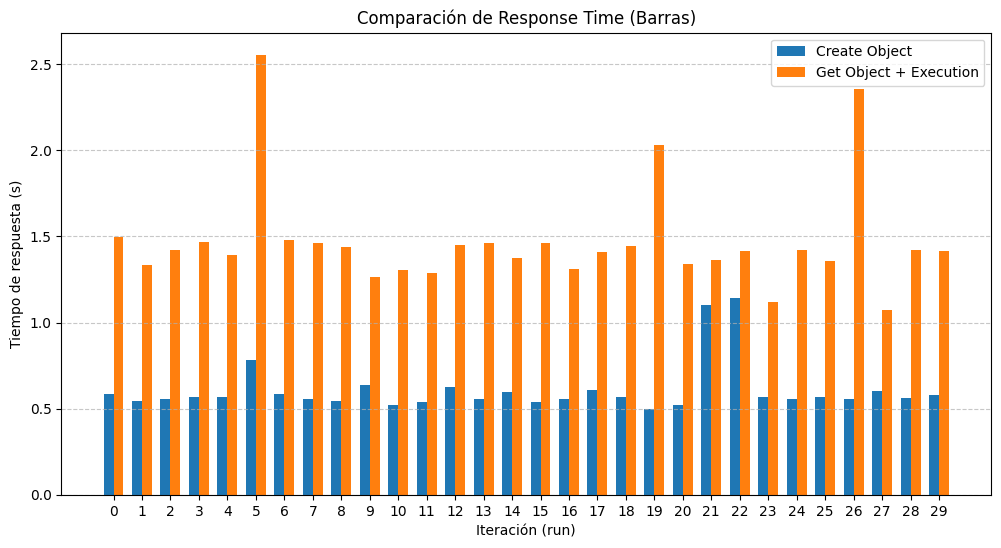

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_response_times_bar(csv1, csv2):
    # Leer CSVs
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)

    # Usar la columna run como índice (si existe), sino usar índice simple
    if "run" in df1.columns and "run" in df2.columns:
        x = df1["run"]
    else:
        x = range(len(df1))

    # Posiciones para las barras
    x = np.arange(len(x))
    width = 0.35  # ancho de cada barra

    plt.figure(figsize=(12,6))

    plt.bar(x - width/2, df1["response_time"], width, label="Create Object")
    plt.bar(x + width/2, df2["response_time"], width, label="Get Object + Execution")

    plt.title("Comparación de Response Time (Barras)")
    plt.xlabel("Iteración (run)")
    plt.ylabel("Tiempo de respuesta (s)")
    plt.xticks(x)  # pone ticks en las posiciones de run
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Uso
plot_response_times_bar("times_create_object_moea.csv", "times_get_object_moea_2.csv")
